In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os
import zipfile


zip_path = "/content/drive/MyDrive/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1.zip"
extract_path = "/content/"

# exceptions are handles properly
if os.path.exists(zip_path):
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f"unzipped!!'{zip_path}' to '{extract_path}'.")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_path}' not a valid zip file.")
    except Exception as e:
        print(f"error: {e}")
else:
    print(f"Zip file cant be found'{zip_path}'.")

unzipped!!'/content/drive/MyDrive/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1.zip' to '/content/'.


In [ ]:
import nibabel as nib
data_dir = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/"

# Function to check if a file is a NIfTI file
def is_nifti_file(filepath):
    try:
        nib.load(filepath)  # Try to load the file as NIfTI
        return True
    except nib.filebasedimages.ImageFileError:
        return False

for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith((".nii", ".nii.gz")):
            filepath = os.path.join(root, file)
            if is_nifti_file(filepath):
                print(f"Verified NIfTI file: {filepath}")
            else:
                print(f"Not a valid NIfTI file: {filepath}")

Verified NIfTI file: /content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans/066.nii
Verified NIfTI file: /content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans/122.nii
Verified NIfTI file: /content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans/067.nii
Verified NIfTI file: /content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans/075.nii
Verified NIfTI file: /content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans/108.nii
Verified NIfTI file: /content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans/058.nii
Verified NIfTI file: /content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/ct_scans/054.nii
Verified NIfTI file: /content/computed-tomography-image

In [ ]:
path = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1"

if not os.path.exists(path):
    print(f"Path does not exist: {path}")
else:
    print(f"Contents of {path}:")

    # List all directories
    for root, dirs, files in os.walk(path):
        level = root.replace(path, '').count(os.sep)
        indent = ' ' * 4 * level
        print(f"{indent}{os.path.basename(root)}/")

        sub_indent = ' ' * 4 * (level + 1)
        for file in files:
            print(f"{sub_indent}{file}")

Contents of /content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1:
computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/
    SHA256SUMS.txt
    split_raw_data.py
    Read_me.txt
    hemorrhage_diagnosis_raw_ct.csv
    LICENSE.txt
    Patient_demographics.csv
    ct_ich.yml
    ct_scans/
        066.nii
        122.nii
        067.nii
        075.nii
        108.nii
        058.nii
        054.nii
        112.nii
        101.nii
        077.nii
        071.nii
        091.nii
        114.nii
        096.nii
        125.nii
        119.nii
        051.nii
        090.nii
        076.nii
        072.nii
        088.nii
        069.nii
        121.nii
        070.nii
        081.nii
        098.nii
        050.nii
        126.nii
        049.nii
        083.nii
        100.nii
        128.nii
        107.nii
        103.nii
        129.nii
        079.nii
        068.nii
        105.nii
        056.nii
        11

In [ ]:
data_dir = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/"
ct_scans_dir = os.path.join(data_dir, "ct_scans")
masks_dir = os.path.join(data_dir, "masks")

expected_patient_ids = [str(i).zfill(3) for i in range(1, 131) if i not in range(59, 66)]

def check_missing_files(directory, expected_ids):
    missing_files = []
    found_ids = set()

    for filename in os.listdir(directory):
        if filename.endswith(".nii"):
            patient_id = filename.split(".")[0]
            found_ids.add(patient_id)

    for patient_id in expected_ids:
        if patient_id not in found_ids:
            missing_files.append(patient_id)

    return missing_files

missing_ct_scans = check_missing_files(ct_scans_dir, expected_patient_ids)

missing_masks = check_missing_files(masks_dir, expected_patient_ids)

# Report missing files
if missing_ct_scans:
    print("Missing CT scans:")
    for patient_id in missing_ct_scans:
        print(f"  {patient_id}.nii")
else:
    print("No missing CT scans found.")

if missing_masks:
    print("\nMissing masks:")
    for patient_id in missing_masks:
        print(f"  {patient_id}.nii")
else:
    print("\nNo missing masks found.")

# Handle missing data
if missing_ct_scans or missing_masks:
    print("\nHandling missing data: Excluding patients with missing files.")
    valid_patient_ids = [pid for pid in expected_patient_ids if pid not in missing_ct_scans and pid not in missing_masks]
    print(f"Valid Patient IDs: {valid_patient_ids}")
else:
  print("\nNo missing patients found. All patients will be used.")

Missing CT scans:
  001.nii
  002.nii
  003.nii
  004.nii
  005.nii
  006.nii
  007.nii
  008.nii
  009.nii
  010.nii
  011.nii
  012.nii
  013.nii
  014.nii
  015.nii
  016.nii
  017.nii
  018.nii
  019.nii
  020.nii
  021.nii
  022.nii
  023.nii
  024.nii
  025.nii
  026.nii
  027.nii
  028.nii
  029.nii
  030.nii
  031.nii
  032.nii
  033.nii
  034.nii
  035.nii
  036.nii
  037.nii
  038.nii
  039.nii
  040.nii
  041.nii
  042.nii
  043.nii
  044.nii
  045.nii
  046.nii
  047.nii
  048.nii

Missing masks:
  001.nii
  002.nii
  003.nii
  004.nii
  005.nii
  006.nii
  007.nii
  008.nii
  009.nii
  010.nii
  011.nii
  012.nii
  013.nii
  014.nii
  015.nii
  016.nii
  017.nii
  018.nii
  019.nii
  020.nii
  021.nii
  022.nii
  023.nii
  024.nii
  025.nii
  026.nii
  027.nii
  028.nii
  029.nii
  030.nii
  031.nii
  032.nii
  033.nii
  034.nii
  035.nii
  036.nii
  037.nii
  038.nii
  039.nii
  040.nii
  041.nii
  042.nii
  043.nii
  044.nii
  045.nii
  046.nii
  047.nii
  048.nii

Handl

In [ ]:
import pandas as pd
import numpy as np
path = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/hemorrhage_diagnosis_raw_ct.csv"
df_diag = pd.read_csv(path)

def swap_target(x):
    if x == 0:
        return 1
    else:
        return 0

# create a new target column
df_diag['Has_Hemorrhage'] = df_diag['No_Hemorrhage'].apply(swap_target)

# drop the old target column
df_diag = df_diag.drop('No_Hemorrhage', axis=1)

print(df_diag.shape)

df_diag.head()


(2814, 9)


,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,Fracture_Yes_No,Has_Hemorrhage
0,49,1,0,0,0,0,0,0,0
1,49,2,0,0,0,0,0,0,0
2,49,3,0,0,0,0,0,0,0
3,49,4,0,0,0,0,0,0,0
4,49,5,0,0,0,0,0,0,0


In [ ]:
data_dir = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/"
ct_scans_dir = os.path.join(data_dir, "ct_scans")

# check image orientation
def check_orientation(filepath):
    try:
        img = nib.load(filepath)
        orientation = nib.aff2axcodes(img.affine)
        return orientation
    except nib.filebasedimages.ImageFileError:
        print(f"Error: Not a valid NIfTI file: {filepath}")
        return None
    except Exception as e:
        print(f"An error occurred while checking orientation for {filepath}: {e}")
        return None

# Dictionary to store orientations
orientations = {}

for filename in os.listdir(ct_scans_dir):
    if filename.endswith(".nii"):
        filepath = os.path.join(ct_scans_dir, filename)
        orientation = check_orientation(filepath)
        if orientation:
            orientations[filename] = orientation

if orientations:
    first_orientation = list(orientations.values())[0]
    consistent = all(orientation == first_orientation for orientation in orientations.values())

    if consistent:
        print(f"All CT scans have the same orientation: {first_orientation}")
    else:
        print("Warning: CT scans have inconsistent orientations.")
        for filename, orientation in orientations.items():
            if orientation != first_orientation:
                print(f"  {filename}: {orientation}")
        print("\nImage Registration may be necessary to align the scans.")

else:
  print("No NIfTI files found in the ct_scans directory.")

All CT scans have the same orientation: ('L', 'A', 'S')


In [ ]:
from pathlib import Path
import imageio
from skimage.transform import resize

# Define a generic windowing function
def apply_window(ct_slice, level, width):
    """
    Apply windowing to a CT slice.

    Parameters:
      ct_slice: 2D numpy array (a single slice)
      level: window level
      width: window width

    Returns:
      A 2D numpy array scaled to [0, 255]
    """
    w_min = level - width / 2
    w_max = level + width / 2
    windowed = (ct_slice - w_min) * (255.0 / (w_max - w_min))
    windowed[windowed < 0] = 0
    windowed[windowed > 255] = 255
    return windowed

# Windowing parameters
brain_level, brain_width = 40, 120
bone_level, bone_width = 500, 2000

new_size = (512, 512)

# Directory containing the dataset
data_dir = Path("/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1")
ct_scans_dir = data_dir / "ct_scans"

output_base = Path("Patients_CT")
output_base.mkdir(exist_ok=True)

valid_patient_ids = [f"{i:03d}" for i in range(49, 131) if i not in range(59, 66)]

for pid in valid_patient_ids:
    ct_file = ct_scans_dir / f"{pid}.nii"
    if not ct_file.exists():
        print(f"CT file not found for patient {pid}")
        continue

    patient_dir = output_base / pid
    brain_dir = patient_dir / "brain"
    bone_dir = patient_dir / "bone"
    brain_dir.mkdir(parents=True, exist_ok=True)
    bone_dir.mkdir(parents=True, exist_ok=True)

    ct_nifti = nib.load(str(ct_file))
    ct_scan = ct_nifti.get_fdata()
    num_slices = ct_scan.shape[2]

    print(f"Processing patient {pid} with {num_slices} slices...")

    for slice_idx in range(num_slices):
        slice_img = ct_scan[:, :, slice_idx]

        # Apply brain window and bone window
        brain_slice = apply_window(slice_img, brain_level, brain_width)
        bone_slice = apply_window(slice_img, bone_level, bone_width)

        # Resize the images to the desired output size
        brain_resized = resize(brain_slice, new_size, anti_aliasing=True)
        bone_resized = resize(bone_slice, new_size, anti_aliasing=True)

        # Convert to uint8 for saving as PNG
        brain_uint8 = np.uint8(brain_resized)
        bone_uint8 = np.uint8(bone_resized)

        # Save the slices as PNG images
        brain_filename = brain_dir / f"{slice_idx:03d}.png"
        bone_filename = bone_dir / f"{slice_idx:03d}.png"

        imageio.imwrite(str(brain_filename), brain_uint8)
        imageio.imwrite(str(bone_filename), bone_uint8)

    print(f"Finished processing patient {pid}.")


Processing patient 049 with 39 slices...
Finished processing patient 049.
Processing patient 050 with 32 slices...
Finished processing patient 050.
Processing patient 051 with 46 slices...
Finished processing patient 051.
Processing patient 052 with 35 slices...
Finished processing patient 052.
Processing patient 053 with 35 slices...
Finished processing patient 053.
Processing patient 054 with 33 slices...
Finished processing patient 054.
Processing patient 055 with 56 slices...
Finished processing patient 055.
Processing patient 056 with 40 slices...
Finished processing patient 056.
Processing patient 057 with 43 slices...
Finished processing patient 057.
Processing patient 058 with 38 slices...
Finished processing patient 058.
Processing patient 066 with 34 slices...
Finished processing patient 066.
Processing patient 067 with 31 slices...
Finished processing patient 067.
Processing patient 068 with 32 slices...
Finished processing patient 068.
Processing patient 069 with 40 slices.

In [ ]:
output_base = Path("Patients_CT")

missing_images = {}

for patient_dir in output_base.iterdir():
    if patient_dir.is_dir():
        brain_dir = patient_dir / "brain"
        bone_dir = patient_dir / "bone"

        brain_images = {img.stem for img in brain_dir.glob("*.png")}
        bone_images = {img.stem for img in bone_dir.glob("*.png")}

        missing_in_bone = brain_images - bone_images
        missing_in_brain = bone_images - brain_images

        # check if there are any missing images
        if missing_in_bone or missing_in_brain:
            missing_images[patient_dir.name] = {
                "missing_in_bone": sorted(missing_in_bone),
                "missing_in_brain": sorted(missing_in_brain)
            }

if missing_images:
    print("Missing images detected:")
    for patient, issues in missing_images.items():
        print(f"Patient {patient}:")
        if issues["missing_in_bone"]:
            print("  Missing in bone:", issues["missing_in_bone"])
        if issues["missing_in_brain"]:
            print("  Missing in brain:", issues["missing_in_brain"])
else:
    print("No missing images detected.")


No missing images detected.


In [ ]:
# same process
data_dir = Path("/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1")
masks_dir = data_dir / "masks"

output_base = Path("Patients_Masks")
output_base.mkdir(exist_ok=True)

# List of valid patient IDs (as strings with leading zeros)
valid_patient_ids = [f"{i:03d}" for i in range(49, 131) if i not in range(59, 66)]

new_size = (512, 512)

for pid in valid_patient_ids:
    mask_file = masks_dir / f"{pid}.nii"
    if not mask_file.exists():
        print(f"Mask file not found for patient {pid}")
        continue

    patient_dir = output_base / pid
    patient_dir.mkdir(parents=True, exist_ok=True)

    mask_nifti = nib.load(str(mask_file))
    mask_data = mask_nifti.get_fdata()
    num_slices = mask_data.shape[2]

    print(f"Processing masks for patient {pid} with {num_slices} slices...")

    for slice_idx in range(num_slices):
        slice_mask = mask_data[:, :, slice_idx]

        # Resize the mask slice to the desired output size
        mask_resized = resize(slice_mask, new_size, anti_aliasing=True)

        # If the mask is binary or has discrete labels, binarize it (threshold can be adjusted as needed)
        mask_binarized = (mask_resized > 0.5).astype(np.uint8) * 255

        # Save the mask slice as a PNG image
        out_filename = patient_dir / f"{slice_idx:03d}.png"
        imageio.imwrite(str(out_filename), mask_binarized)

    print(f"Finished processing masks for patient {pid}.")


Processing masks for patient 049 with 39 slices...
Finished processing masks for patient 049.
Processing masks for patient 050 with 32 slices...
Finished processing masks for patient 050.
Processing masks for patient 051 with 46 slices...
Finished processing masks for patient 051.
Processing masks for patient 052 with 35 slices...
Finished processing masks for patient 052.
Processing masks for patient 053 with 35 slices...
Finished processing masks for patient 053.
Processing masks for patient 054 with 33 slices...
Finished processing masks for patient 054.
Processing masks for patient 055 with 56 slices...
Finished processing masks for patient 055.
Processing masks for patient 056 with 40 slices...
Finished processing masks for patient 056.
Processing masks for patient 057 with 43 slices...
Finished processing masks for patient 057.
Processing masks for patient 058 with 38 slices...
Finished processing masks for patient 058.
Processing masks for patient 066 with 34 slices...
Finished 

In [ ]:
csv_path = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/hemorrhage_diagnosis_raw_ct.csv"
df_diag = pd.read_csv(csv_path)

def get_mask_path(row):
    patient = f"{int(row['PatientNumber']):03d}"
    slice_num = f"{int(row['SliceNumber']):03d}"
    return f"/content/Patients_Masks/{patient}/{slice_num}.png"

def get_brain_image_path(row):
    patient = f"{int(row['PatientNumber']):03d}"
    slice_num = f"{int(row['SliceNumber']):03d}"
    return f"/content/Patients_CT/{patient}/brain/{slice_num}.png"

def get_bone_image_path(row):
    patient = f"{int(row['PatientNumber']):03d}"
    slice_num = f"{int(row['SliceNumber']):03d}"
    return f"/content/Patients_CT/{patient}/bone/{slice_num}.png"

df_diag['mask_path'] = df_diag.apply(get_mask_path, axis=1)
df_diag['brain_image_path'] = df_diag.apply(get_brain_image_path, axis=1)
df_diag['bone_image_path'] = df_diag.apply(get_bone_image_path, axis=1)

print(df_diag.head())

   PatientNumber  SliceNumber  Intraventricular  Intraparenchymal  \
0             49            1                 0                 0   
1             49            2                 0                 0   
2             49            3                 0                 0   
3             49            4                 0                 0   
4             49            5                 0                 0   

   Subarachnoid  Epidural  Subdural  No_Hemorrhage  Fracture_Yes_No  \
0             0         0         0              1                0   
1             0         0         0              1                0   
2             0         0         0              1                0   
3             0         0         0              1                0   
4             0         0         0              1                0   

                             mask_path  \
0  /content/Patients_Masks/049/001.png   
1  /content/Patients_Masks/049/002.png   
2  /content/Patients_Masks/049/0

In [ ]:
print(df_diag.columns.tolist())

['PatientNumber', 'SliceNumber', 'Intraventricular', 'Intraparenchymal', 'Subarachnoid', 'Epidural', 'Subdural', 'No_Hemorrhage', 'Fracture_Yes_No', 'mask_path', 'brain_image_path', 'bone_image_path']


In [ ]:
import shutil
csv_path = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/hemorrhage_diagnosis_raw_ct.csv"

df_diag = pd.read_csv(csv_path)

output_folder = "/content/masks"
os.makedirs(output_folder, exist_ok=True)

count = 0

for index, row in df_diag.iterrows():
    # Check if there is hemorrhage; No_Hemorrhage==0 means hemorrhage is present.
    if row['No_Hemorrhage'] == 0:
        patient = f"{int(row['PatientNumber']):03d}"
        # Adjust the slice number: subtract 1 (CSV starts at 1 while files start at 000)
        slice_index = int(row['SliceNumber']) - 1
        # Create the file name (e.g., "000.png", "001.png", ...)
        slice_fname = f"{slice_index:03d}.png"
        src_path = os.path.join("/content/Patients_Masks", patient, slice_fname)
        # Define the destination file name; using patient and slice info to keep names unique
        dst_fname = f"{patient}_{slice_fname}"
        dst_path = os.path.join(output_folder, dst_fname)

        # Check if the source file exists, then copy it
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)
            count += 1
        else:
            print(f"File not found: {src_path}")
print(f"Total hemorrhage mask images copied: {count}")

num_files = len([f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))])
print(f"Number of images in '{output_folder}': {num_files}")

Total hemorrhage mask images copied: 318
Number of images in '/content/masks': 318


In [ ]:
csv_path = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/hemorrhage_diagnosis_raw_ct.csv"

df_diag = pd.read_csv(csv_path)

output_folder_no_hem = "/content/masks_no_hem"
os.makedirs(output_folder_no_hem, exist_ok=True)

count_no_hem = 0

for idx, row in df_diag.iterrows():
    # Check for non-hemorrhage: No_Hemorrhage == 1 means no hemorrhage
    if row['No_Hemorrhage'] == 1:
        patient = f"{int(row['PatientNumber']):03d}"
        # Adjust the slice number: CSV is 1-indexed, but files are 0-indexed
        slice_index = int(row['SliceNumber']) - 1
        slice_fname = f"{slice_index:03d}.png"

        src_path = os.path.join("/content/Patients_Masks", patient, slice_fname)
        dst_fname = f"{patient}_{slice_fname}"
        dst_path = os.path.join(output_folder_no_hem, dst_fname)

        # If the source file exists, move it to the new folder
        if os.path.exists(src_path):
            shutil.move(src_path, dst_path)
            count_no_hem += 1
        else:
            print(f"File not found: {src_path}")

print(f"Total non-hemorrhage mask images moved: {count_no_hem}")

num_files_no_hem = len([f for f in os.listdir(output_folder_no_hem) if os.path.isfile(os.path.join(output_folder_no_hem, f))])
print(f"Number of images in '{output_folder_no_hem}': {num_files_no_hem}")

Total non-hemorrhage mask images moved: 2496
Number of images in '/content/masks_no_hem': 2496


In [ ]:
base_path = "/content/"
patients_ct_folder = os.path.join(base_path, "Patients_CT")

brain_image_dir = os.path.join(base_path, "brain")
os.makedirs(brain_image_dir, exist_ok=True)

csv_path = os.path.join(base_path, "computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1", "hemorrhage_diagnosis_raw_ct.csv")

df_diag = pd.read_csv(csv_path)
folder_list = sorted([folder for folder in os.listdir(patients_ct_folder) if folder.isdigit()])
for folder_name in folder_list:
    patient_num = int(folder_name)
    df_patient = df_diag[df_diag['PatientNumber'] == patient_num]
    for idx, row in df_patient.iterrows():
        # Get the slice number from CSV (1-indexed) and convert to 0-indexed for file naming
        slice_number = int(row['SliceNumber'])
        file_index = slice_number - 1
        src_path = os.path.join(patients_ct_folder, folder_name, "brain", f"{file_index:03d}.png")

        new_file_name = f"{patient_num:03d}_{file_index:03d}.png"
        dst_path = os.path.join(brain_image_dir, new_file_name)

        # Check if the source file exists before copying
        if os.path.exists(src_path):
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"Missing file: {src_path}")

num_brain_images = len([f for f in os.listdir(brain_image_dir) if os.path.isfile(os.path.join(brain_image_dir, f))])
print("Number of brain images copied:", num_brain_images)

Number of brain images copied: 2814


In [ ]:
# same process
base_path = "/content/"

patients_ct_folder = os.path.join(base_path, "Patients_CT")
bone_image_dir = os.path.join(base_path, "bone")
os.makedirs(bone_image_dir, exist_ok=True)
csv_path = os.path.join(base_path, "computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1", "hemorrhage_diagnosis_raw_ct.csv")

df_diag = pd.read_csv(csv_path)

folder_list = sorted([folder for folder in os.listdir(patients_ct_folder) if folder.isdigit()])

for folder_name in folder_list:
    patient_num = int(folder_name)

    df_patient = df_diag[df_diag['PatientNumber'] == patient_num]

    for idx, row in df_patient.iterrows():
        # Get the slice number from CSV (1-indexed) and convert to 0-indexed for file naming
        slice_number = int(row['SliceNumber'])
        file_index = slice_number - 1

        # Construct the source file path: images are in Patients_CT/<patient>/bone and named as image(name or number).png
        src_path = os.path.join(patients_ct_folder, folder_name, "bone", f"{file_index:03d}.png")

        new_file_name = f"{patient_num:03d}_{file_index:03d}.png"
        dst_path = os.path.join(bone_image_dir, new_file_name)

        if os.path.exists(src_path):
            shutil.copyfile(src_path, dst_path)
        else:
            print(f"Missing file: {src_path}")

num_bone_images = len([f for f in os.listdir(bone_image_dir) if os.path.isfile(os.path.join(bone_image_dir, f))])
print("Number of bone images copied:", num_bone_images)

Number of bone images copied: 2814


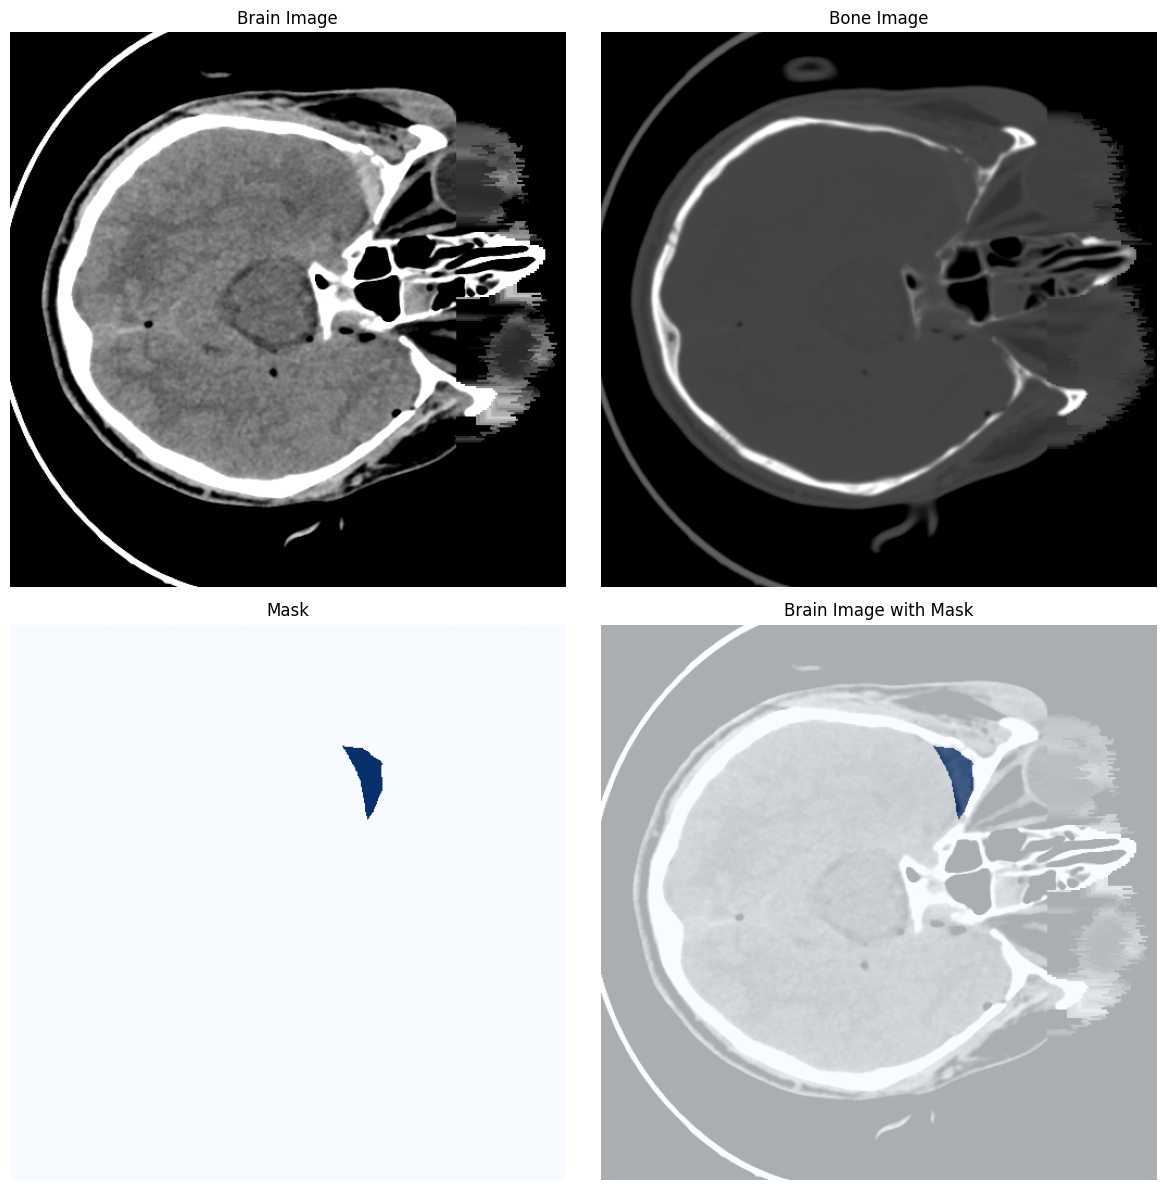

In [ ]:
import matplotlib.pyplot as plt

base_path = "/content/"
csv_path = os.path.join(base_path, "computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1", "hemorrhage_diagnosis_raw_ct.csv")
brain_folder = os.path.join(base_path, "brain")
bone_folder = os.path.join(base_path, "bone")
masks_folder = os.path.join(base_path, "masks")

df_diag = pd.read_csv(csv_path)

if 'new_image_fname' not in df_diag.columns:
    df_diag['new_image_fname'] = df_diag.apply(lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber']) - 1:03d}.png", axis=1)

if 'new_mask_fname' not in df_diag.columns:
    df_diag['new_mask_fname'] = df_diag.apply(lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber']) - 1:03d}.png", axis=1)

# index for plot
index = 14
brain_fname = df_diag.loc[index, 'new_image_fname']
mask_fname  = df_diag.loc[index, 'new_mask_fname']

brain_path = os.path.join(brain_folder, brain_fname)
bone_path  = os.path.join(bone_folder, brain_fname)
mask_path  = os.path.join(masks_folder, mask_fname)

brain_image = plt.imread(brain_path)
bone_image  = plt.imread(bone_path)
mask        = plt.imread(mask_path)

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Brain image
axes[0, 0].imshow(brain_image, cmap='gray')
axes[0, 0].set_title("Brain Image")
axes[0, 0].axis("off")

# Bone image
axes[0, 1].imshow(bone_image, cmap='gray')
axes[0, 1].set_title("Bone Image")
axes[0, 1].axis("off")

# Mask
axes[1, 0].imshow(mask, cmap='Blues')
axes[1, 0].set_title("Mask")
axes[1, 0].axis("off")

# Overlay of brain and mark(blues here)
axes[1, 1].imshow(brain_image, cmap='gray')
axes[1, 1].imshow(mask, cmap='Blues', alpha=0.7)
axes[1, 1].set_title("Brain Image with Mask")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


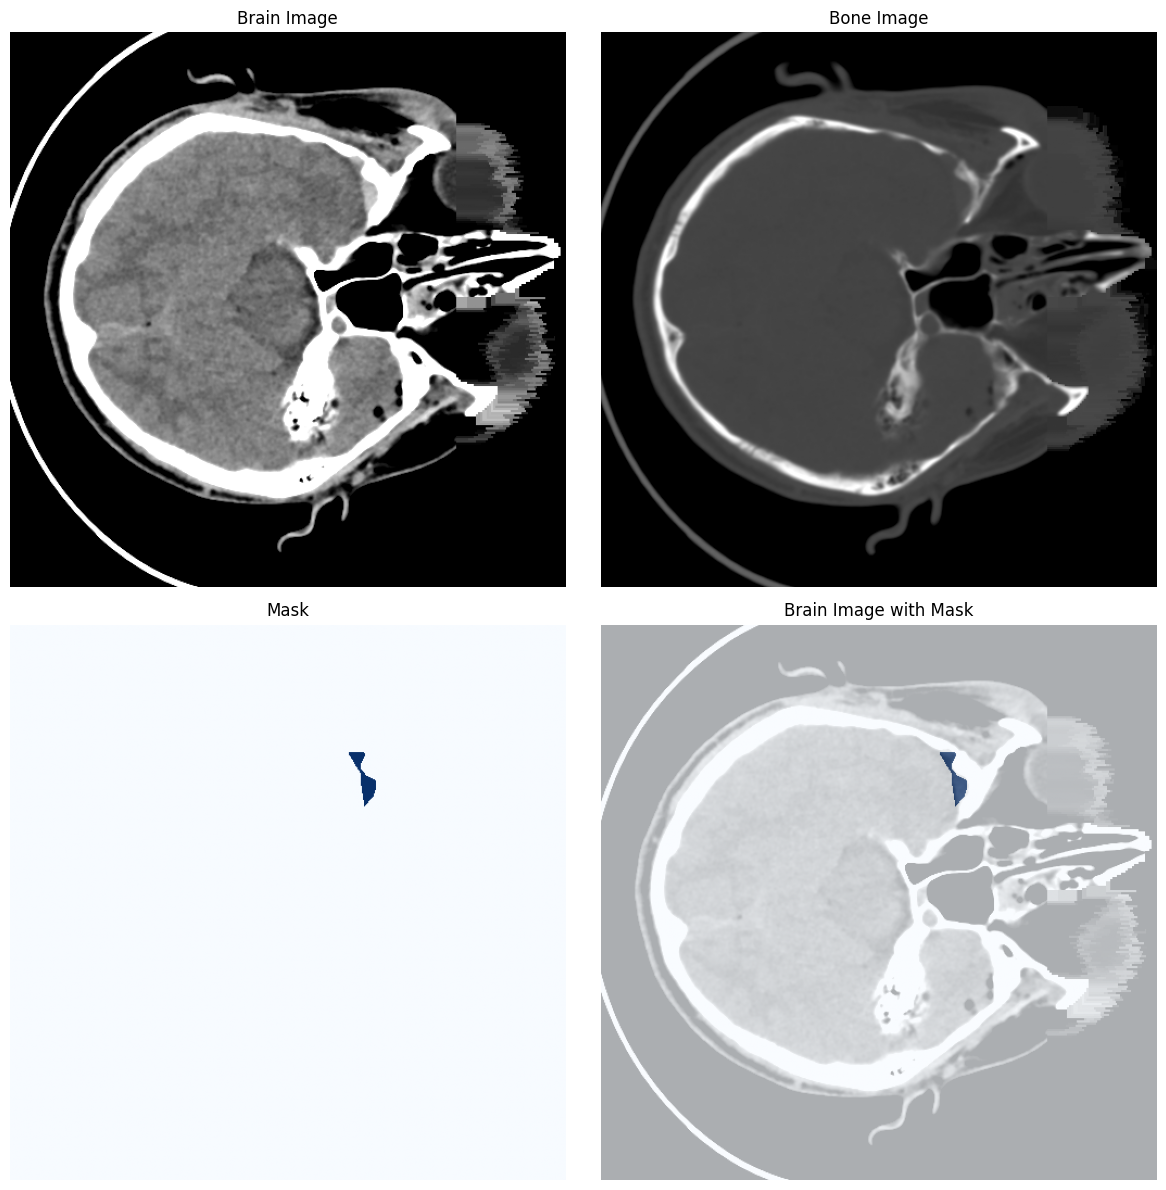

In [ ]:
# same process
base_path = "/content/"
csv_path = os.path.join(base_path, "computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1", "hemorrhage_diagnosis_raw_ct.csv")
brain_folder = os.path.join(base_path, "brain")
bone_folder = os.path.join(base_path, "bone")
masks_folder = os.path.join(base_path, "masks")

df_diag = pd.read_csv(csv_path)

if 'new_image_fname' not in df_diag.columns:
    df_diag['new_image_fname'] = df_diag.apply(
        lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber']) - 1:03d}.png", axis=1)

if 'new_mask_fname' not in df_diag.columns:
    df_diag['new_mask_fname'] = df_diag.apply(
        lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber']) - 1:03d}.png", axis=1)


df_hem = df_diag[df_diag['No_Hemorrhage'] == 0]
if df_hem.empty:
    print("No hemorrhage cases found in the CSV.")
else:

    row = df_hem.iloc[0]
    brain_fname = row['new_image_fname']
    mask_fname  = row['new_mask_fname']

    brain_path = os.path.join(brain_folder, brain_fname)
    bone_path  = os.path.join(bone_folder, brain_fname)
    mask_path  = os.path.join(masks_folder, mask_fname)


    brain_image = plt.imread(brain_path)
    bone_image  = plt.imread(bone_path)
    mask        = plt.imread(mask_path)

    # 2x2 plot
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Brain image
    axes[0, 0].imshow(brain_image, cmap='gray')
    axes[0, 0].set_title("Brain Image")
    axes[0, 0].axis("off")

    # Bone image
    axes[0, 1].imshow(bone_image, cmap='gray')
    axes[0, 1].set_title("Bone Image")
    axes[0, 1].axis("off")

    # Mask only
    axes[1, 0].imshow(mask, cmap='Blues')
    axes[1, 0].set_title("Mask")
    axes[1, 0].axis("off")

    # Overlay of brain and mark(blues here)
    axes[1, 1].imshow(brain_image, cmap='gray')
    axes[1, 1].imshow(mask, cmap='Blues', alpha=0.7)
    axes[1, 1].set_title("Brain Image with Mask")
    axes[1, 1].axis("off")

    plt.tight_layout()
    plt.show()

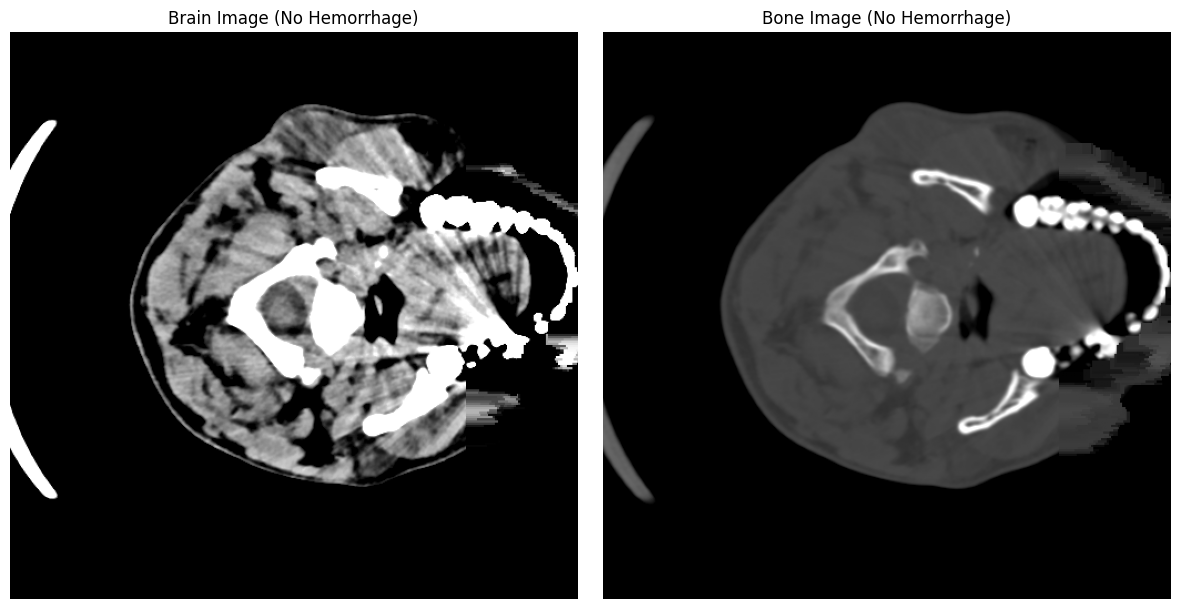

In [ ]:
base_path = "/content/"
csv_path = os.path.join(base_path, "computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1", "hemorrhage_diagnosis_raw_ct.csv")
brain_folder = os.path.join(base_path, "brain")
bone_folder = os.path.join(base_path, "bone")

df_diag = pd.read_csv(csv_path)

if 'new_image_fname' not in df_diag.columns:
    df_diag['new_image_fname'] = df_diag.apply(
        lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber']) - 1:03d}.png", axis=1)

df_no_hem = df_diag[df_diag['No_Hemorrhage'] == 1]
if df_no_hem.empty:
    print("No non-hemorrhage cases found in the CSV.")
else:
    row = df_no_hem.iloc[0]
    fname = row['new_image_fname']
    brain_path = os.path.join(brain_folder, fname)
    bone_path  = os.path.join(bone_folder, fname)

    brain_image = plt.imread(brain_path)
    bone_image  = plt.imread(bone_path)

    # 1x2 grid as it is for maks
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # brain image
    axes[0].imshow(brain_image, cmap='gray')
    axes[0].set_title("Brain Image (No Hemorrhage)")
    axes[0].axis("off")

    # Plot bone image
    axes[1].imshow(bone_image, cmap='gray')
    axes[1].set_title("Bone Image (No Hemorrhage)")
    axes[1].axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
import albumentations as albu

aug_types = albu.Compose([
    albu.HorizontalFlip(p=0.5),
    albu.OneOf([
        albu.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0),
        albu.RandomGamma(gamma_limit=(80, 120), p=1.0),
    ], p=0.3),
    albu.OneOf([
        albu.ElasticTransform(alpha=120, sigma=120 * 0.05, p=1.0),
        albu.GridDistortion(p=1.0),
        albu.OpticalDistortion(distort_limit=2, p=1.0),
    ], p=0.3),
    albu.Affine(scale=(0.9, 1.1), rotate=(-10, 10), translate_percent=0.1, p=0.5, border_mode=0),
])

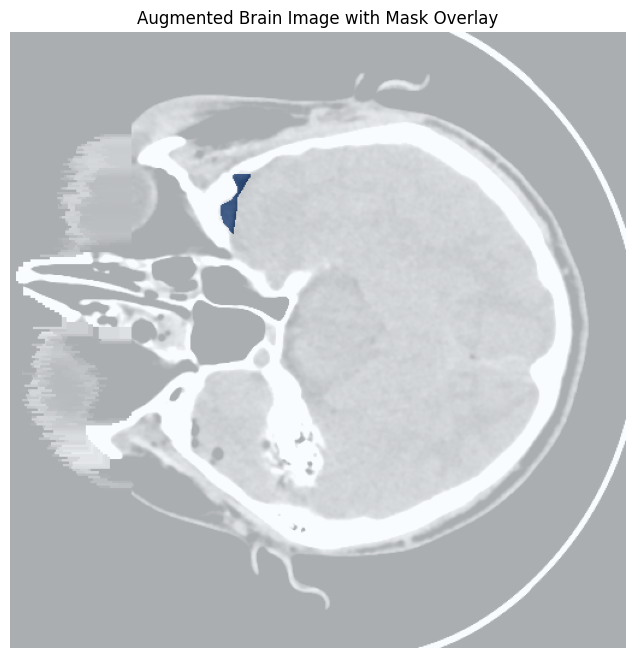

In [ ]:
aug_types = albu.Compose([
    albu.HorizontalFlip(p=0.5),
    albu.OneOf([
        albu.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=1.0),
        albu.RandomGamma(gamma_limit=(80, 120), p=1.0),
    ], p=0.3),
    albu.OneOf([
        albu.ElasticTransform(alpha=120, sigma=120 * 0.05, p=1.0),
        albu.GridDistortion(p=1.0),
        albu.OpticalDistortion(distort_limit=2, p=1.0),
    ], p=0.3),
    albu.Affine(scale=(0.9, 1.1), rotate=(-10, 10), translate_percent=0.1, p=0.5, border_mode=0),
])

# helper function for augmentation
def augment_image_and_mask(aug, image, mask):
    augmented = aug(image=image, mask=mask)
    return augmented['image'], augmented['mask']

base_path = "/content/"
csv_path = os.path.join(base_path, "computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1", "hemorrhage_diagnosis_raw_ct.csv")
brain_folder = os.path.join(base_path, "brain")
masks_folder = os.path.join(base_path, "masks")

df_diag = pd.read_csv(csv_path)


if 'new_image_fname' not in df_diag.columns:
    df_diag['new_image_fname'] = df_diag.apply(
        lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber']) - 1:03d}.png", axis=1)

if 'new_mask_fname' not in df_diag.columns:
    df_diag['new_mask_fname'] = df_diag.apply(
        lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber']) - 1:03d}.png", axis=1)

# Filter for a hemorrhage case (No_Hemorrhage == 0)
df_hem = df_diag[df_diag['No_Hemorrhage'] == 0]
if df_hem.empty:
    print("No hemorrhage cases found!")
else:
    row = df_hem.iloc[0]

    brain_fname = row['new_image_fname']
    mask_fname  = row['new_mask_fname']

    brain_path = os.path.join(brain_folder, brain_fname)
    mask_path  = os.path.join(masks_folder, mask_fname)

    brain_image = plt.imread(brain_path)
    mask = plt.imread(mask_path)

    aug_image, aug_mask = augment_image_and_mask(aug_types, brain_image, mask)

    plt.figure(figsize=(8,8))
    plt.imshow(aug_image, cmap='gray')
    plt.imshow(aug_mask, cmap='Blues', alpha=0.7)
    plt.axis('off')
    plt.title("Augmented Brain Image with Mask Overlay")
    plt.show()

In [ ]:
NUM_TEST_IMAGES = 10
csv_path = "/content/computed-tomography-images-for-intracranial-hemorrhage-detection-and-segmentation-1.3.1/hemorrhage_diagnosis_raw_ct.csv"
df_diag = pd.read_csv(csv_path)

# Add new filename columns if not present
if 'new_image_fname' not in df_diag.columns:
    df_diag['new_image_fname'] = df_diag.apply(
        lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber'])-1:03d}.png", axis=1)

if 'new_mask_fname' not in df_diag.columns:
    df_diag['new_mask_fname'] = df_diag.apply(
        lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber'])-1:03d}.png", axis=1)

print("Initial df_diag shape:", df_diag.shape)  # (total_rows, 13)

df_no_hem = df_diag[df_diag['No_Hemorrhage'] == 1]
df_no_hem = df_no_hem.sample(NUM_TEST_IMAGES, random_state=101).reset_index(drop=True)
test_images_list_no = list(df_no_hem['new_mask_fname'])

df_diag = df_diag[~df_diag['new_mask_fname'].isin(test_images_list_no)]

df_with_hem = df_diag[df_diag['No_Hemorrhage'] == 0]
df_with_hem = df_with_hem.sample(NUM_TEST_IMAGES, random_state=102).reset_index(drop=True)
test_images_list_hem = list(df_with_hem['new_mask_fname'])

# Remove these rows from the main dataframe.
df_diag = df_diag[~df_diag['new_mask_fname'].isin(test_images_list_hem)]

df_test = pd.concat([df_with_hem, df_no_hem], axis=0).reset_index(drop=True)

print("Remaining training/validation set shape:", df_diag.shape)
print("Test set shape:", df_test.shape)

Initial df_diag shape: (2814, 11)
Remaining training/validation set shape: (2794, 11)
Test set shape: (20, 11)


In [ ]:
df_test.head()

,PatientNumber,SliceNumber,Intraventricular,Intraparenchymal,Subarachnoid,Epidural,Subdural,No_Hemorrhage,Fracture_Yes_No,new_image_fname,new_mask_fname
0,49,20,0,0,0,1,0,0,1,049_019.png,049_019.png
1,50,26,0,1,0,0,0,0,1,050_025.png,050_025.png
2,81,34,0,0,0,0,1,0,0,081_033.png,081_033.png
3,49,27,0,1,0,0,0,0,1,049_026.png,049_026.png
4,70,13,0,0,0,1,0,0,0,070_012.png,070_012.png


In [ ]:
df_test.to_csv('df_test.csv.gz', compression='gzip', index=False)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df_diag, test_size=0.2, random_state=42, stratify=df_diag['No_Hemorrhage'])

print("Training set shape:", df_train.shape)
print("Validation set shape:", df_val.shape)
print("Test set shape:", df_test.shape)

Training set shape: (2235, 11)
Validation set shape: (559, 11)
Test set shape: (20, 11)


In [ ]:
df_train['No_Hemorrhage'].value_counts()

,count
No_Hemorrhage,
1,1989
0,246


In [ ]:
df_val['No_Hemorrhage'].value_counts()

,count
No_Hemorrhage,
1,497
0,62


In [ ]:
df_train.to_csv('/content/train_data.csv.gz', index=False, compression='gzip')
df_val.to_csv('/content/val_data.csv.gz', index=False, compression='gzip')

print("Compressed CSV files saved.")

Compressed CSV files saved.


In [ ]:
! pip install segmentation-models

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
!pip install -U segmentation-models
!pip install -U efficientnet

  Attempting uninstall: efficientnet
    Found existing installation: efficientnet 1.0.0
    Uninstalling efficientnet-1.0.0:
      Successfully uninstalled efficientnet-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
segmentation-models 1.0.1 requires efficientnet==1.0.0, but you have efficientnet 1.1.1 which is incompatible.


In [ ]:
import tensorflow as tf
import segmentation_models as sm

sm.set_framework('tf.keras')
print("Segmentation Models framework:", sm.framework())

BACKBONE = 'densenet121'
preprocess_input = sm.get_preprocessing(BACKBONE)

Segmentation Models: using `keras` framework.
Segmentation Models framework: tf.keras


In [ ]:
import cv2
IMAGE_HEIGHT = 256
IMAGE_WIDTH  = 256
IMAGE_CHANNELS = 3
brain_image_dir = '/content/brain/'
mask_dir_hem = '/content/masks/'         # for hemorrhage cases (No_Hemorrhage == 0)
mask_dir_no_hem = '/content/masks_no_hem/' # for non-hemorrhage cases (No_Hemorrhage == 1)

# def augment_image_and_mask(aug, image, mask):
#     augmented = aug(image=image, mask=mask)
#     return augmented['image'], augmented['mask']

def train_generator(batch_size=10):
    while True:
        for df in pd.read_csv('/content/train_data.csv.gz', chunksize=batch_size):
            image_id_list = list(df['new_image_fname'])
            mask_id_list = list(df['new_mask_fname'])

            no_hemo_list = list(df['No_Hemorrhage'])

            X_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            # Masks will be single channel (binary or grayscale)
            Y_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool_)

            valid_sample_idx = 0
            for i in range(len(image_id_list)):
                image_id = image_id_list[i]
                mask_id = mask_id_list[i]
                no_hemo  = no_hemo_list[i]

                img_path = os.path.join(brain_image_dir, image_id)
                image = cv2.imread(img_path)
                if image is None:
                    print("Missing image:", img_path)
                    continue
                # Convert from BGR to RGB and resize to 256x256
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))

                if int(no_hemo) == 1:
                    # Non-hemorrhage: use masks_no_hem folder
                    chosen_mask_dir = mask_dir_no_hem
                else:
                    # Hemorrhage: use masks folder
                    chosen_mask_dir = mask_dir_hem

                mask_path = os.path.join(chosen_mask_dir, mask_id)
                mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)
                if mask is None:
                    print("Missing mask:", mask_path)
                    continue
                # Resize mask to 256x256
                mask = cv2.resize(mask, (IMAGE_WIDTH, IMAGE_HEIGHT))
                if len(mask.shape) == 2:
                    mask = np.expand_dims(mask, axis=-1)

                aug_image, aug_mask = augment_image_and_mask(aug_types, image, mask)

                X_train[valid_sample_idx] = aug_image
                Y_train[valid_sample_idx] = aug_mask
                valid_sample_idx += 1

            # If some samples were skipped, trim the batch arrays
            X_train = X_train[:valid_sample_idx]
            Y_train = Y_train[:valid_sample_idx]

            # Normalize the brain images to [0, 1]
            X_train = X_train / 255.0

            yield X_train, Y_train

train_gen = train_generator(batch_size=10)

X_train, Y_train = next(train_gen)

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)

X_train shape: (10, 256, 256, 3)
Y_train shape: (10, 256, 256, 1)


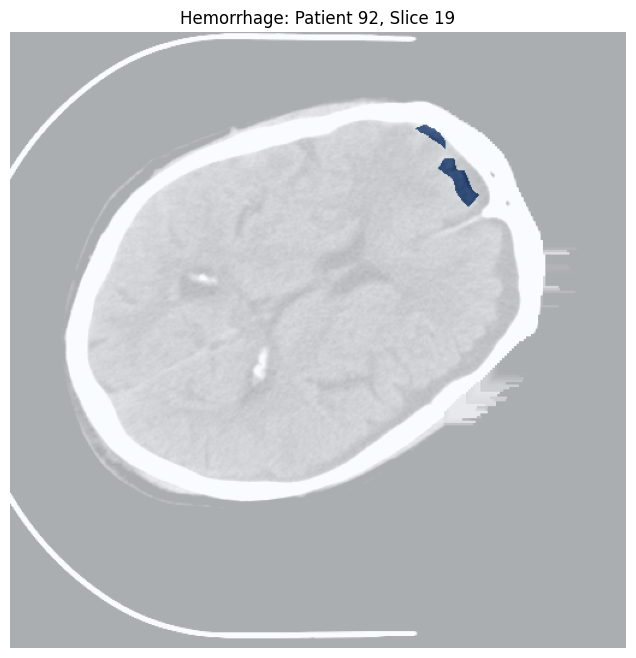

In [ ]:
brain_image_dir = '/content/brain/'
mask_dir_hem = '/content/masks/'
df_train = pd.read_csv('/content/train_data.csv.gz')

# Ensure new_image_fname and new_mask_fname columns exist (0-indexed filenames)
df_train['new_image_fname'] = df_train.apply(
    lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber'])-1:03d}.png", axis=1)
df_train['new_mask_fname'] = df_train.apply(
    lambda row: f"{int(row['PatientNumber']):03d}_{int(row['SliceNumber'])-1:03d}.png", axis=1)

df_hem = df_train[df_train['No_Hemorrhage'] == 0]
if df_hem.empty:
    print("No hemorrhage cases found in the training data!")
else:
    row = df_hem.sample(n=1, random_state=None).iloc[0]
    brain_fname = row['new_image_fname']
    mask_fname = row['new_mask_fname']

    brain_path = os.path.join(brain_image_dir, brain_fname)
    mask_path = os.path.join(mask_dir_hem, mask_fname)

    brain_image = plt.imread(brain_path)
    mask_image = plt.imread(mask_path)

    plt.figure(figsize=(8,8))
    plt.imshow(brain_image, cmap='gray')
    plt.imshow(mask_image, cmap='Blues', alpha=0.7)
    plt.axis('off')
    plt.title(f"Hemorrhage: Patient {row['PatientNumber']}, Slice {row['SliceNumber']}")
    plt.show()


In [ ]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH  = 256
IMAGE_CHANNELS = 3

brain_image_dir = '/content/brain/'
mask_dir_hem = '/content/masks/'
mask_dir_no_hem = '/content/masks_no_hem/'

def val_generator(batch_size=10):
    while True:
        for df in pd.read_csv('val_data.csv.gz', chunksize=batch_size):
            image_id_list = list(df['new_image_fname'])
            mask_id_list = list(df['new_mask_fname'])
            no_hemo_list = list(df['No_Hemorrhage'])

            X_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            Y_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)

            for i, image_id in enumerate(image_id_list):
                path = os.path.join(brain_image_dir, image_id)
                image = cv2.imread(path)
                if image is None:
                    print("Missing image:", path)
                    continue
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
                X_val[i] = image

            for j, (mask_id, no_hemo) in enumerate(zip(mask_id_list, no_hemo_list)):
                # If No_Hemorrhage is 1, then the case is non-hemorrhage and mask is in masks_no_hem
                chosen_mask_dir = mask_dir_no_hem if int(no_hemo) == 1 else mask_dir_hem
                path = os.path.join(chosen_mask_dir, mask_id)
                mask = cv2.imread(path, cv2.IMREAD_UNCHANGED)
                if mask is None:
                    print("Missing mask:", path)
                    continue
                mask = cv2.resize(mask, (IMAGE_WIDTH, IMAGE_HEIGHT))
                # If mask is 2D, add a channel dimension.
                if len(mask.shape) == 2:
                    mask = np.expand_dims(mask, axis=-1)
                Y_val[j] = mask

            # Normalize
            X_val = X_val / 255.0

            yield X_val, Y_val


val_gen = val_generator(batch_size=10)
X_val, Y_val = next(val_gen)

print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)

X_val shape: (10, 256, 256, 3)
Y_val shape: (10, 256, 256, 1)


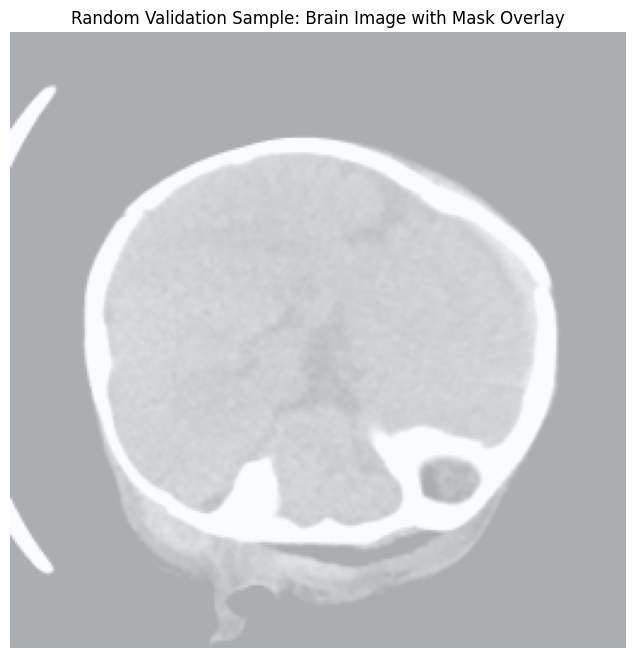

In [ ]:
import matplotlib.pyplot as plt
X_val, Y_val = next(val_gen)

idx = np.random.randint(0, X_val.shape[0])

brain_image = X_val[idx]
mask = Y_val[idx]

brain_gray = np.mean(brain_image, axis=-1)

plt.figure(figsize=(8, 8))
plt.imshow(brain_gray, cmap='gray')
plt.imshow(mask[:, :, 0], cmap='Blues', alpha=0.7)  # mask is single-channel
plt.axis('off')
plt.title("Random Validation Sample: Brain Image with Mask Overlay")
plt.show()


In [ ]:
IMAGE_HEIGHT = 256
IMAGE_WIDTH  = 256
IMAGE_CHANNELS = 3

brain_image_dir = '/content/brain/'
mask_dir_hem = '/content/masks/'
mask_dir_no_hem = '/content/masks_no_hem/'

def test_generator(batch_size=1):
    while True:
        for df in pd.read_csv('df_test.csv.gz', chunksize=batch_size):
            image_id_list = list(df['new_image_fname'])
            mask_id_list = list(df['new_mask_fname'])
            no_hemo_list = list(df['No_Hemorrhage'])

            X_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            Y_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, 1), dtype=np.bool)

            for i, image_id in enumerate(image_id_list):
                path = os.path.join(brain_image_dir, image_id)
                image = cv2.imread(path)
                if image is None:
                    print("Missing image:", path)
                    continue
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT))
                X_test[i] = image

            for j, (mask_id, no_hemo) in enumerate(zip(mask_id_list, no_hemo_list)):
                chosen_mask_dir = mask_dir_no_hem if int(no_hemo) == 1 else mask_dir_hem
                path = os.path.join(chosen_mask_dir, mask_id)
                mask = cv2.imread(path, cv2.IMREAD_UNCHANGED)
                if mask is None:
                    print("Missing mask:", path)
                    continue
                mask = cv2.resize(mask, (IMAGE_WIDTH, IMAGE_HEIGHT))
                if len(mask.shape) == 2:
                    mask = np.expand_dims(mask, axis=-1)
                Y_test[j] = mask

            X_test = X_test / 255.0

            yield X_test, Y_test


test_gen = test_generator(batch_size=15)
X_test, Y_test = next(test_gen)

print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_test shape: (15, 256, 256, 3)
Y_test shape: (15, 256, 256, 1)


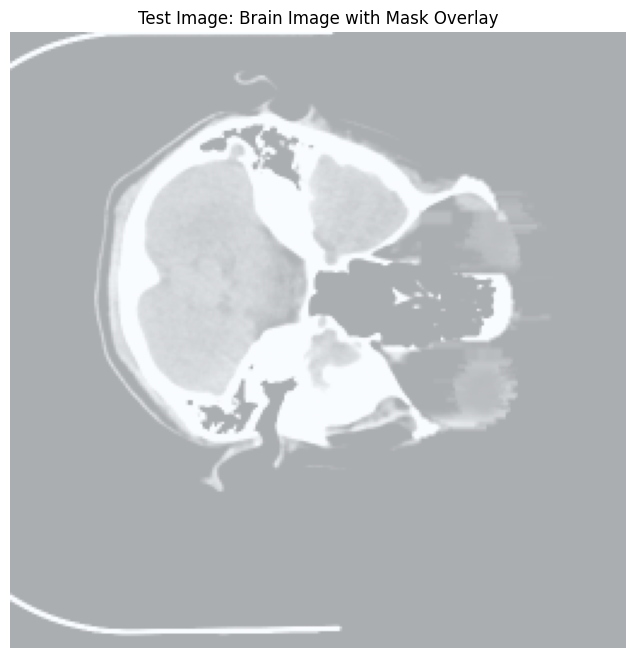

In [ ]:
X_test, Y_test = next(test_gen)
idx = np.random.randint(0, X_test.shape[0])

brain_image = X_test[idx]   # shape: (256, 256, 3)
mask = Y_test[idx]          # shape: (256, 256, 1)
brain_gray = np.mean(brain_image, axis=-1)
plt.figure(figsize=(8, 8))
plt.imshow(brain_gray, cmap='gray')
plt.imshow(mask[:, :, 0], cmap='Blues', alpha=0.7)  # overlay mask; used first channel of mask
plt.axis('off')
plt.title("Test Image: Brain Image with Mask Overlay")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Conv2D, Conv2DTranspose, MaxPooling2D,
                                     Dropout, concatenate)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.initializers import he_normal

def unet(input_size=(256, 256, 3)):
    """U-Net architecture for 256x256 RGB images."""
    inputs = Input(input_size)

    # Encoder (Downsampling)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(inputs)
    conv1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(pool1)
    conv2 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(pool2)
    conv3 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(pool3)
    conv4 = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    # Bottleneck
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(pool4)
    conv5 = Conv2D(1024, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv5)
    drop5 = Dropout(0.5)(conv5)

    # Decoder (Upsampling)
    up6 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(drop5)
    merge6 = concatenate([drop4, up6], axis=3)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(merge6)
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv6)

    up7 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6)
    merge7 = concatenate([conv3, up7], axis=3)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(merge7)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv7)

    up8 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7)
    merge8 = concatenate([conv2, up8], axis=3)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(merge8)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv8)

    up9 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8)
    merge9 = concatenate([conv1, up9], axis=3)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(merge9)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv9)
    conv9 = Conv2D(2, (3, 3), activation='relu', padding='same', kernel_initializer=he_normal())(conv9)

    conv10 = Conv2D(1, (1, 1), activation='sigmoid')(conv9)

    model = Model(inputs=inputs, outputs=conv10)
    model.compile(optimizer=Adam(1e-4), loss=binary_crossentropy, metrics=['accuracy'])
    return model

model = unet(input_size=(256, 256, 3))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 256, 256, 64)   │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 256, 256, 64)   │         36,928 │ conv2d_20[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 128, 128, 64)   │              0 │ conv2d_21[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 128, 128, 128)  │        147,584 │ conv2d_22[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 64, 64, 128)    │              0 │ conv2d_23[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_5[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 64, 64, 256)    │        590,080 │ conv2d_24[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_6           │ (None, 32, 32, 256)    │              0 │ conv2d_25[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_26[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 32, 32, 512)    │              0 │ conv2d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 16, 16, 512)    │              0 │ dropout_2[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 16, 16, 1024)   │      4,719,616 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 16, 16, 1024)   │      9,438,208 │ conv2d_28[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_3 (Dropout)       │ (None, 16, 16, 1024)   │              0 │ conv2d_29[0][0]        │
├──────────────────────

 Total params: 31,032,837 (118.38 MB)

 Trainable params: 31,032,837 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd

df_test = pd.read_csv('df_test.csv.gz')
test_size = len(df_test)
print("Number of test samples:", test_size)

test_gen = test_generator(batch_size=test_size)

X_test, Y_test = next(test_gen)

print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

Number of test samples: 20
X_test shape: (20, 256, 256, 3)
Y_test shape: (20, 256, 256, 1)


In [ ]:
import math
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

BATCH_SIZE = 10
train_gen = train_generator(batch_size=BATCH_SIZE)
val_gen   = val_generator(batch_size=BATCH_SIZE)

num_train_samples = 2800
num_val_samples   = 200

steps_per_epoch = math.ceil(num_train_samples / BATCH_SIZE)
validation_steps = math.ceil(num_val_samples / BATCH_SIZE)

# Defined callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('unet_model.h5', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model.fit(
    train_gen,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=val_gen,
    validation_steps=validation_steps,
    callbacks=[early_stopping, checkpoint, reduce_lr]
)

model.load_weights('unet_model.h5')

Epoch 1/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.9977 - loss: 0.0705

280/280 ━━━━━━━━━━━━━━━━━━━━ 265s 740ms/step - accuracy: 0.9977 - loss: 0.0704 - val_accuracy: 0.9990 - val_loss: 0.0060 - learning_rate: 1.0000e-04
Epoch 2/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 153s 547ms/step - accuracy: 0.9991 - loss: 0.0086 - val_accuracy: 0.9989 - val_loss: 0.0068 - learning_rate: 1.0000e-04
Epoch 3/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.9991 - loss: 0.0086

280/280 ━━━━━━━━━━━━━━━━━━━━ 173s 620ms/step - accuracy: 0.9991 - loss: 0.0086 - val_accuracy: 0.9996 - val_loss: 0.0028 - learning_rate: 1.0000e-04
Epoch 4/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 151s 540ms/step - accuracy: 0.9992 - loss: 0.0064 - val_accuracy: 0.9992 - val_loss: 0.0052 - learning_rate: 1.0000e-04
Epoch 5/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 152s 542ms/step - accuracy: 0.9990 - loss: 0.0072 - val_accuracy: 0.9989 - val_loss: 0.0063 - learning_rate: 1.0000e-04
Epoch 6/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 152s 543ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.9995 - val_loss: 0.0041 - learning_rate: 1.0000e-04
Epoch 7/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 202s 722ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.9992 - val_loss: 0.0049 - learning_rate: 1.0000e-04
Epoch 8/50
280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.9992 - loss: 0.0048
Epoch 8: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
280/280 ━━━━━━━━━━━━━━━━━━━━ 202s 722ms/step - 

In [ ]:
model.save('/content/drive/MyDrive/ModelWeights/final_unet_model.h5')
model.save('unet_model.keras')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 128, 128, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        147,584 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 128)    │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 64, 64, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 256)    │        590,080 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 256)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 512)    │      1,180,160 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 512)    │      2,359,808 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32, 32, 512)    │              0 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 16, 16, 512)    │              0 │ dropout[0][0]          │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 16, 16, 1024)   │      4,719,616 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 16, 16, 1024)   │      9,438,208 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 16, 16, 1024)   │              0 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose     

 Total params: 31,032,837 (118.38 MB)

 Trainable params: 31,032,837 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

Test set size: 20
X_test shape: (20, 256, 256, 3)
Y_test shape: (20, 256, 256, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 37s 37s/step
Predictions shape: (20, 256, 256, 1)


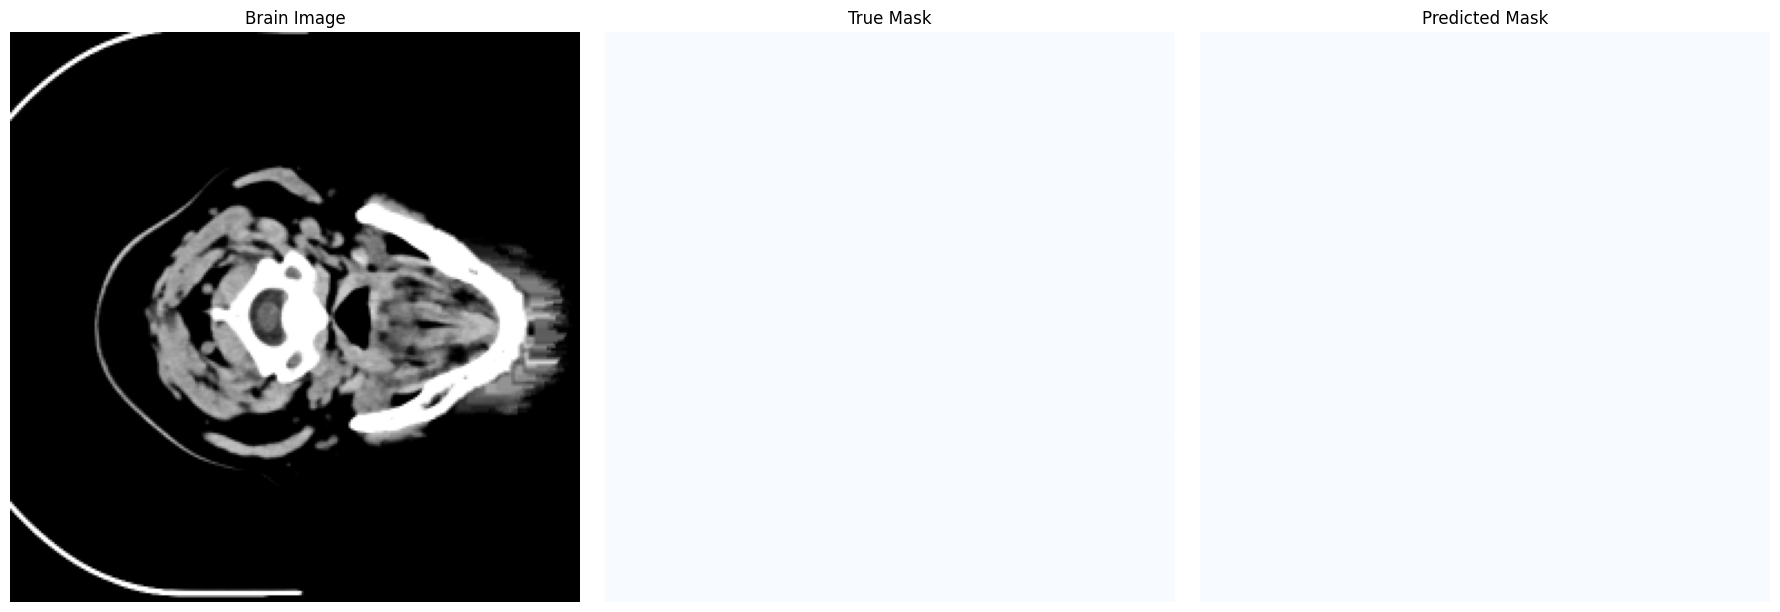

In [ ]:
model = tf.keras.models.load_model('/content/unet_model.keras', compile=False)
model.summary()

df_test = pd.read_csv('df_test.csv.gz')
test_size = len(df_test)
print("Test set size:", test_size)

test_gen = test_generator(batch_size=test_size)
X_test, Y_test = next(test_gen)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
predictions = model.predict(X_test)
print("Predictions shape:", predictions.shape)

idx = np.random.randint(0, X_test.shape[0])
brain_image = X_test[idx]
true_mask = Y_test[idx]
pred_mask = predictions[idx]
brain_gray = np.mean(brain_image, axis=-1)
pred_mask_bin = (pred_mask > 0.5).astype(np.uint8)


plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(brain_gray, cmap='gray')
plt.title("Brain Image")
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(true_mask[:,:,0], cmap='Blues')
plt.title("True Mask")
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(pred_mask_bin[:,:,0], cmap='Blues')
plt.title("Predicted Mask")
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
predictions = model.predict(X_test, verbose=1)
preds_test_thresh = (predictions >= 0.7).astype(np.uint8)
from scipy.stats import ttest_ind, f_oneway

segmented_area = preds_test_thresh.reshape(preds_test_thresh.shape[0], -1).sum(axis=1)
print("Segmented area for each test sample:")
print(segmented_area)

1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step
Segmented area for each test sample:
[33228 13391 25852 27441 26259 22693 26745 27299 26937 24383     0 15545
 18386 29324 15363 28235 22624 17095 24842  9953]


In [ ]:
df_test = pd.read_csv('df_test.csv.gz')

df_test['SegArea'] = segmented_area

df_test['Cohort'] = df_test['No_Hemorrhage'].apply(lambda x: 'Group1' if int(x) == 1 else 'Group2')

print("\ndf_test sample after adding SegArea and Cohort:")
print(df_test.head())


df_test sample after adding SegArea and Cohort:
   PatientNumber  SliceNumber  Intraventricular  Intraparenchymal  \
0             49           20                 0                 0   
1             50           26                 0                 1   
2             81           34                 0                 0   
3             49           27                 0                 1   
4             70           13                 0                 0   

   Subarachnoid  Epidural  Subdural  No_Hemorrhage  Fracture_Yes_No  \
0             0         1         0              0                1   
1             0         0         0              0                1   
2             0         0         1              0                0   
3             0         0         0              0                1   
4             0         1         0              0                0   

  new_image_fname new_mask_fname  SegArea  Cohort  
0     049_019.png    049_019.png    33228  Group2  
1    

In [ ]:
group1 = df_test[df_test['Cohort'] == 'Group1']['SegArea']
group2 = df_test[df_test['Cohort'] == 'Group2']['SegArea']

print("\nGroup1 (non-hemorrhage) sample size:", len(group1))
print("Group2 (hemorrhage) sample size:", len(group2))

if len(group1) > 0 and len(group2) > 0:
    t_stat, p_val = ttest_ind(group1, group2)
    print("\nTwo-sample t-test results:")
    print("t-statistic:", t_stat)
    print("p-value:", p_val)
else:
    print("\nNot enough samples in one or both groups for t-test.")

if len(group2) >= 5:
    df_test['Cohort_ANOVA'] = df_test['Cohort']
    # Randomly assign 30%
    group2_indices = df_test[df_test['Cohort'] == 'Group2'].index
    np.random.seed(42)
    indices_to_change = np.random.choice(group2_indices, size=int(0.3 * len(group2_indices)), replace=False)
    df_test.loc[indices_to_change, 'Cohort_ANOVA'] = 'Group3'

    groups = [df_test[df_test['Cohort_ANOVA'] == grp]['SegArea']
              for grp in df_test['Cohort_ANOVA'].unique()]
    f_stat, p_val_anova = f_oneway(*groups)
    print("\nOne-way ANOVA results:")
    print("F-statistic:", f_stat)
    print("p-value:", p_val_anova)
else:
    print("\nNot enough samples in Group2 to simulate a third group for ANOVA.")



Group1 (non-hemorrhage) sample size: 10
Group2 (hemorrhage) sample size: 10

Two-sample t-test results:
t-statistic: -2.266070507004946
p-value: 0.03601225953434169

One-way ANOVA results:
F-statistic: 3.5029605680408045
p-value: 0.053224261473098805


<Figure size 800x600 with 0 Axes>

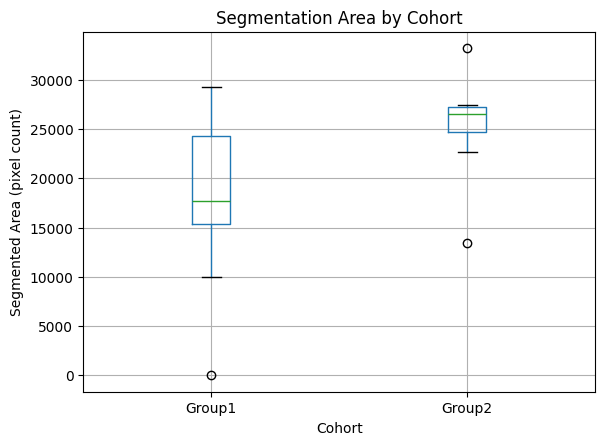

In [ ]:
plt.figure(figsize=(8, 6))
df_test.boxplot(column='SegArea', by='Cohort')
plt.title("Segmentation Area by Cohort")
plt.suptitle("")
plt.xlabel("Cohort")
plt.ylabel("Segmented Area (pixel count)")
plt.show()